<a href="https://colab.research.google.com/github/jraval/Unit2BuildProjectLambda/blob/main/DSPT10_JR_LS_DS_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [24]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/jraval/Unit2BuildProjectLambda/main/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
import io
from io import BytesIO
!pip install zipfile36

In [4]:
import zipfile

In [35]:
# Read in data from your Build Week Dataset
fall_url = 'https://raw.githubusercontent.com/jraval/Unit2BuildProjectLambda/main/KaggleFallDetection_2_8_21.csv'



#df = pd.io.parsers.read_csv(fall_url, dtype={'https://github.com/jraval/Unit2BuildProjectLambda/blob/main/KaggleFallDetection_2_8_21_3.csv': 'str'})

In [36]:
df = pd.read_csv(fall_url)

In [37]:
df.head()

ACTIVITY     TIME        SL      EEG  BP   HR  CIRCLUATION
0         3  4722.92   4019.64 -1600.00  13   79          317
1         2  4059.12   2191.03 -1146.08  20   54          165
2         2  4773.56   2787.99 -1263.38  46   67          224
3         4  8271.27   9545.98 -2848.93  26  138          554
4         4  7102.16  14148.80 -2381.15  85  120          809

Your code starts here:

In [63]:
# Change column names: replace spaces with underscores
df.rename(columns={'CIRCLUATION':'CIRCULATION'}, inplace=True)

#EDA

(7.0, 0.0)

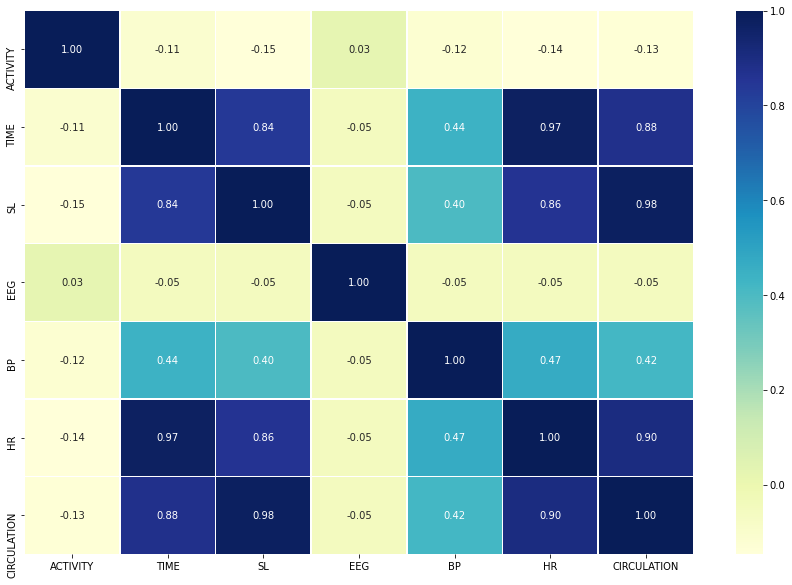

In [64]:
#I like this better than the correlation matrix in Pandas Profiling

import seaborn as sns#EDA - determine which columns to drop, there was overfitting in train set

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

In [65]:
# Get Pandas Profiling Report
import pandas as pd
import pandas_profiling

pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Choose your target 

Which column in your tabular dataset will you predict?

I picked incidence of falls as my target because that is what the study was measuring, can we predict falling?

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



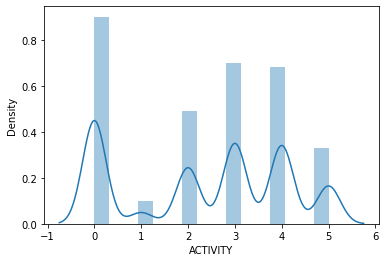

In [66]:
import seaborn as sns #There is no clear majority
import matplotlib.pyplot as plt
sns.distplot(df['ACTIVITY']);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



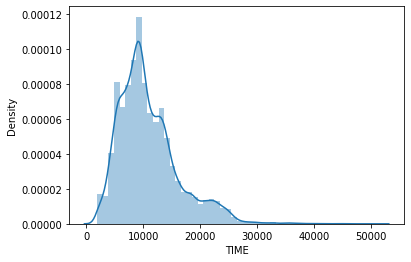

In [67]:
sns.distplot(df['TIME'], kde=True);#Time is skewed

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



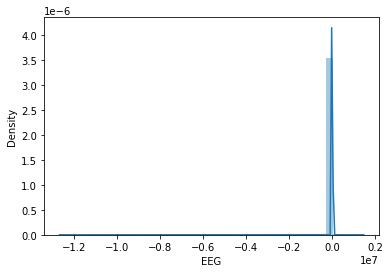

In [68]:
sns.distplot(df['EEG'], kde=True);

The Key for values

0- Standing
1- Walking
2- Sitting
3- Falling
4- Cramps
5- Running

In [69]:
y = df['ACTIVITY']#As we can see there is no clear majority class, standing has the largest plurality
y.nunique()
y.value_counts(normalize=True)

0    0.281284
3    0.219021
4    0.213283
2    0.152729
5    0.103040
1    0.030643
Name: ACTIVITY, dtype: float64

In [70]:
df.columns

Index(['ACTIVITY', 'TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCULATION'], dtype='object')

In [74]:
# Add an OLS (Ordinary Least Squares) trendline,
# to see how the outliers influence the "line of best fit"
import plotly.express as px
px.scatter(df, x= 'SL', y='CIRCULATION', trendline='ols')

In [76]:
df=df.fillna('Missing') #I may get rid of this line when I add an imputer

#Pick Target, begin feature selection

In [83]:
df['FALLS'] = df['ACTIVITY']  #I'm expecting overfitting if I use these features because they were part of the same column, these features are essentially tied together.
df['STANDING'] = df['ACTIVITY']
df['WALKING'] = df['ACTIVITY']
df['SITTING'] = df['ACTIVITY']
df['CRAMPS'] = df['ACTIVITY']
df['RUNNING'] = df['ACTIVITY']

In [84]:
df = df.replace({'FALLS':{3:1, 1:0, 2:0, 4:0, 5:0}})
df = df.replace({'STANDING':{0:1, 1:0, 2:0, 3:0, 4:0, 5:0}})
df = df.replace({'WALKING':{2:0, 3:0, 4:0, 5:0}})
df = df.replace({'SITTING':{1:0, 2:1, 3:0, 4:0, 5:0,}})
df = df.replace({'CRAMPS':{1:0, 2:0, 3:0, 4:1, 5:0}})
df = df.replace({'RUNNING':{1:0, 2:0, 3:0, 4:0, 5:1}})

In [85]:
build_df = df

In [86]:
target = 'FALLS'

(13.0, 0.0)

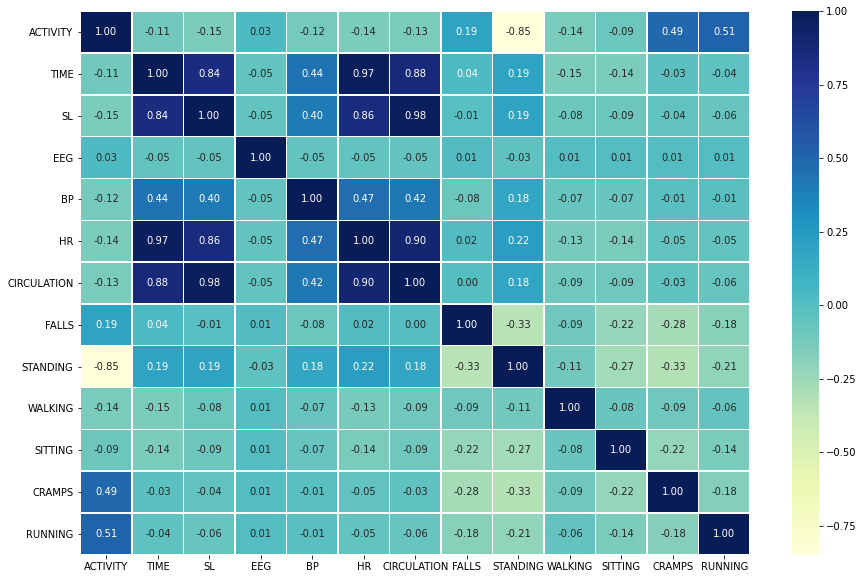

In [87]:
#EDA - determine which columns to drop, there was overfitting in train set
corr_matrix = build_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

In [88]:
build_df = build_df.drop(columns=['ACTIVITY', 'WALKING', 'SITTING', 'CRAMPS', 'RUNNING', 'STANDING', 'TIME'])

(6.0, 0.0)

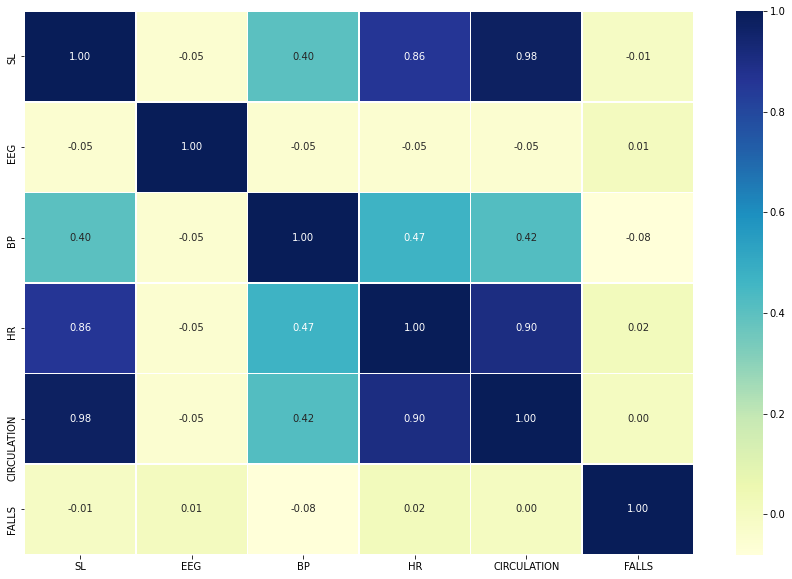

In [89]:
import seaborn as sns #EDA - determine which columns to drop, there was overfitting in train set, circulation should be dropped but I'm leaving it for now.

corr_matrix = build_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

#Split Train, Val, Test, Create Feature Matrix and Target

In [90]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [112]:
# Split train into train & test. Make val the same size as test.
target = 'FALLS'
train, test = train_test_split(build_df, test_size=0.2,  
                              stratify=build_df[target], random_state=42)

In [113]:
train, val = train_test_split(train, test_size=len(test),  
                              stratify=train[target], random_state=42)

In [138]:
val.head()

SL      EEG   BP   HR  CIRCULATION  FALLS
8064     4160.77 -1511.60  111   88          318      1
14793    2634.00 -1846.00   15   62          202      0
31     161030.00 -8830.00   91  388         6290      0
3155   126948.00 -8516.00  137  316         4916      0
755     21169.00 -2864.42   80  145         1156      0

In [139]:
test.head()

SL       EEG  BP   HR  CIRCULATION  FALLS
15372   13613.9  -1470.78  17   96          804      0
4668   299501.0 -10100.00  99  537         8350      1
2015    59527.6  -4760.00  35  215         2188      1
14274   16838.0  -3341.00  36  159          974      0
274     79842.1  -7020.00  42  272         3539      1

In [114]:
train.shape, val.shape, test.shape

((9828, 6), (3277, 6), (3277, 6))

In [115]:
# Arrange data into X features matrix and y target vector
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]


In [116]:
X_train.columns


Index(['SL', 'EEG', 'BP', 'HR', 'CIRCULATION'], dtype='object')

#Baseline Accuracy


In [117]:
y_train.value_counts(normalize=True).max()


0.7810337810337811

#Build Model


In [118]:
pipeline = make_pipeline(
    ce.OneHotEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10, max_leaf_nodes=500)
)#Random Forest pipeline/model

In [119]:
model = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy='median'),  
    DecisionTreeClassifier(max_depth=11)
)#Decision Tree Model


In [120]:
pipeline.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=[], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassif...strap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=10, max_features='auto',
                                        max_leaf_nodes=500, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=

In [121]:
model.fit(X_train, y_train)



/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=[], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=11,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, mi

#Metrics 
- Random Forest -1
- Decision Tree -2

In [122]:
print('Train Accuracy', pipeline.score(X_train, y_train)) #Train initially had leakage but I changed the max_depth
#Random Forest

Train Accuracy 0.8754578754578755


In [123]:
print('Validation Accuracy', pipeline.score(X_val, y_val))#RF

Validation Accuracy 0.8230088495575221


In [124]:
print('Test Accuracy', pipeline.score(X_test, y_test))#RF


Test Accuracy 0.8471162648764113


In [125]:
print('Train Accuracy', model.score(X_train, y_train))#Decision Tree

Train Accuracy 0.8948921448921449


In [126]:
print('Val Accuracy', model.score(X_val, y_val))#DT

Val Accuracy 0.831858407079646


In [127]:
print('Test Accuracy', model.score(X_test, y_test))#DT

Test Accuracy 0.8266707354287458


#Baseline

In [140]:
y_test.value_counts(normalize=True).max(), y_val.value_counts(normalize=True).max()

(0.7808971620384498, 0.7808971620384498)

#ROC-AUC Score probability for the last class

In [143]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_val)[:,-1] # probability for the last class 
print('Val Score Decision Tree:', roc_auc_score(y_val, y_pred_proba))


Val Score Decision Tree: 0.8478413616913815


In [145]:
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_val)[:,-1] # probability for the last class 
print('Val Score Random Forest:', roc_auc_score(y_val, y_pred_proba))


Val Score Random Forest: 0.8898216573544028


#Quick EDA on target


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



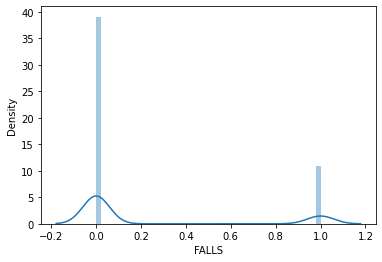

In [146]:
y = df['FALLS']
sns.distplot(y);


In [132]:
#Will remove outliers in next assignment and some more EDA during this week.

